In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

##### Scikit Learn modules needed for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder,MinMaxScaler , StandardScaler

# Plotting libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [ ]:
df = pd.read_csv("PrediksiAsuransiTravel.csv")
df.head()

,Unnamed: 0,Usia,Jenis Pekerjaan,LulusanAtauTidak,Pendapatantahunan,Anggotakeluarga,Penyakitkronis,SelebaranSering,PernahBepergiankeLuarNegeri,Asuransiperjalanan
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
#checking null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   1987 non-null   int64 
 1   Usia                         1987 non-null   int64 
 2   Jenis Pekerjaan              1987 non-null   object
 3   LulusanAtauTidak             1987 non-null   object
 4   Pendapatantahunan            1987 non-null   int64 
 5   Anggotakeluarga              1987 non-null   int64 
 6   Penyakitkronis               1987 non-null   int64 
 7   SelebaranSering              1987 non-null   object
 8   PernahBepergiankeLuarNegeri  1987 non-null   object
 9   Asuransiperjalanan           1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
df.describe()

,Unnamed: 0,Usia,Pendapatantahunan,Anggotakeluarga,Penyakitkronis,Asuransiperjalanan
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


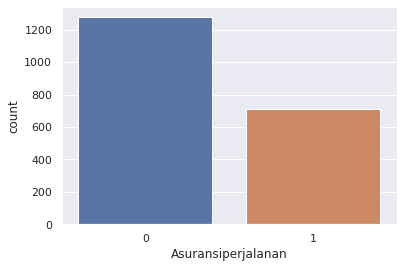

In [ ]:
sns.set_style('darkgrid')
sns.countplot(data=df,x='Asuransiperjalanan')
plt.show()

In [ ]:
df.PernahBepergiankeLuarNegeri.unique()##cheching uniqness

array(['No', 'Yes'], dtype=object)

In [ ]:
df.SelebaranSering.unique()##cheching uniqness

array(['No', 'Yes'], dtype=object)

In [ ]:
df.LulusanAtauTidak.unique()##cheching uniqness

array(['Yes', 'No'], dtype=object)

In [ ]:
#function for converting yes or no

def clean_string(x):
    if x == 'Yes':
        return 1
    else:
        return 0

In [ ]:
#function for employment
def employment(x):
    if x == 'Government Sector':
        return 1
    else:
        return 0

In [ ]:
df.head()

,Unnamed: 0,Usia,Jenis Pekerjaan,LulusanAtauTidak,Pendapatantahunan,Anggotakeluarga,Penyakitkronis,SelebaranSering,PernahBepergiankeLuarNegeri,Asuransiperjalanan
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [ ]:
df_clean = df
df_clean['LulusanAtauTidak'] = df_clean['LulusanAtauTidak'].apply(clean_string)
df_clean['SelebaranSering'] = df_clean['SelebaranSering'].apply(clean_string)
df_clean['PernahBepergiankeLuarNegeri'] = df_clean['PernahBepergiankeLuarNegeri'].apply(clean_string)
df_clean['Jenis Pekerjaan'] = df_clean['Jenis Pekerjaan'].apply(employment)

In [ ]:
df_clean

,Unnamed: 0,Usia,Jenis Pekerjaan,LulusanAtauTidak,Pendapatantahunan,Anggotakeluarga,Penyakitkronis,SelebaranSering,PernahBepergiankeLuarNegeri,Asuransiperjalanan
0,0,31,1,1,400000,6,1,0,0,0
1,1,31,0,1,1250000,7,0,0,0,0
2,2,34,0,1,500000,4,1,0,0,1
3,3,28,0,1,700000,3,1,0,0,0
4,4,28,0,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,0,1,1500000,4,0,1,1,1
1983,1983,28,0,1,1750000,5,1,0,1,0
1984,1984,28,0,1,1150000,6,1,0,0,0
1985,1985,34,0,1,1000000,6,0,1,1,1


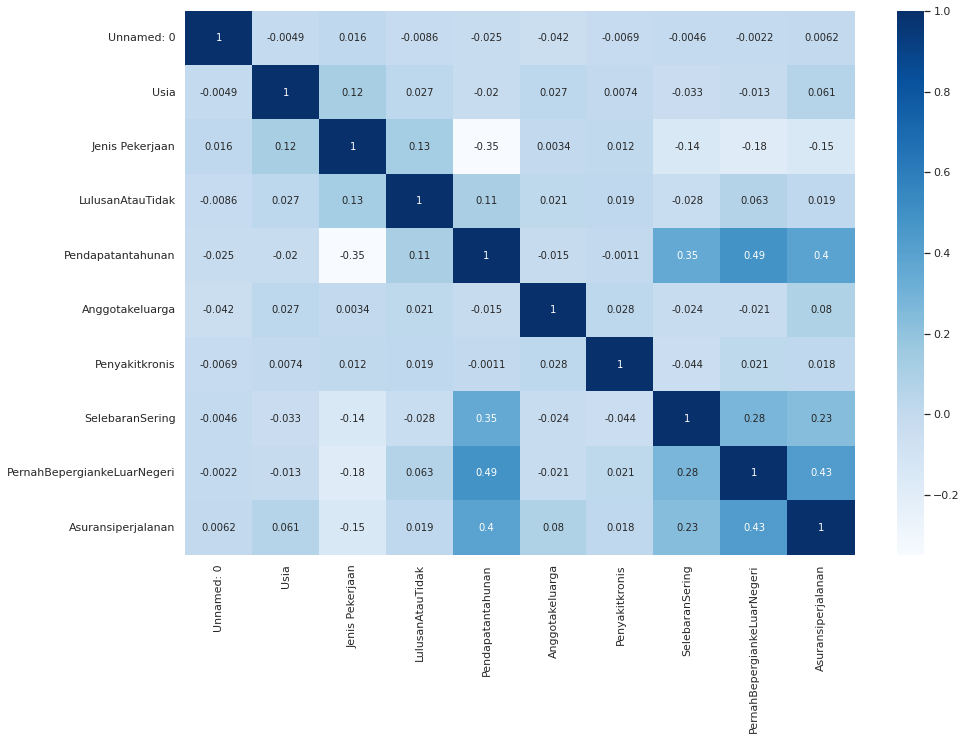

In [ ]:
## correlation will give relation between each variable
correlation = df_clean.corr()
plt.figure(figsize=(15,10) )
sns.heatmap(correlation,annot = True,cmap = 'Blues')

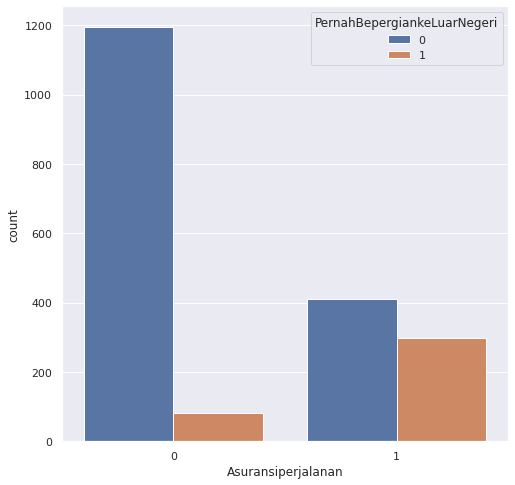

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='PernahBepergiankeLuarNegeri',x='Asuransiperjalanan',data=df)
plt.show()

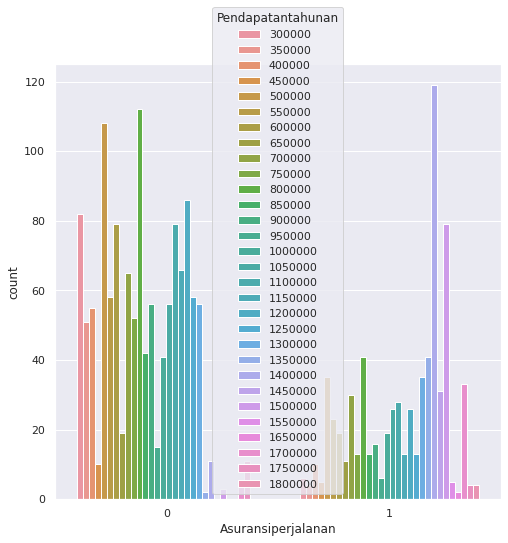

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='Pendapatantahunan',x='Asuransiperjalanan',data=df)
plt.show()

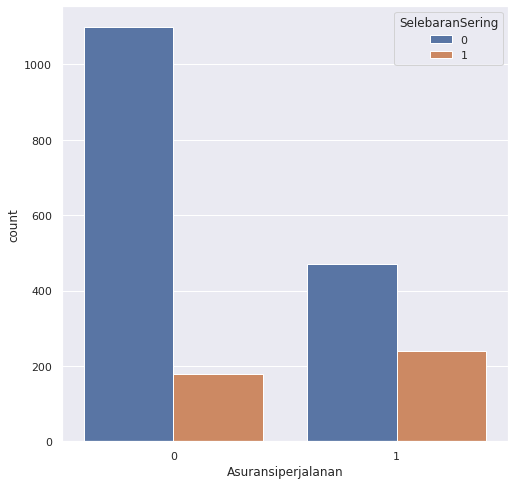

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(hue='SelebaranSering',x='Asuransiperjalanan',data=df)
plt.show()

In [ ]:
df_clean.head()

,Unnamed: 0,Usia,Jenis Pekerjaan,LulusanAtauTidak,Pendapatantahunan,Anggotakeluarga,Penyakitkronis,SelebaranSering,PernahBepergiankeLuarNegeri,Asuransiperjalanan
0,0,31,1,1,400000,6,1,0,0,0
1,1,31,0,1,1250000,7,0,0,0,0
2,2,34,0,1,500000,4,1,0,0,1
3,3,28,0,1,700000,3,1,0,0,0
4,4,28,0,1,700000,8,1,1,0,0


In [ ]:
df_drop = df_clean.drop("Unnamed: 0",axis=1) ## dropping 1st column which dont have any relation in data

In [ ]:
df_drop.head()

,Usia,Jenis Pekerjaan,LulusanAtauTidak,Pendapatantahunan,Anggotakeluarga,Penyakitkronis,SelebaranSering,PernahBepergiankeLuarNegeri,Asuransiperjalanan
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1
3,28,0,1,700000,3,1,0,0,0
4,28,0,1,700000,8,1,1,0,0


In [ ]:
df_drop.Asuransiperjalanan.value_counts()

0    1277
1     710
Name: Asuransiperjalanan, dtype: int64

In [ ]:
x = df_drop.iloc[:,:-1]
x.head()

,Usia,Jenis Pekerjaan,LulusanAtauTidak,Pendapatantahunan,Anggotakeluarga,Penyakitkronis,SelebaranSering,PernahBepergiankeLuarNegeri
0,31,1,1,400000,6,1,0,0
1,31,0,1,1250000,7,0,0,0
2,34,0,1,500000,4,1,0,0
3,28,0,1,700000,3,1,0,0
4,28,0,1,700000,8,1,1,0


In [ ]:
y = df_drop['Asuransiperjalanan']
y.head(10)

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    1
8    1
9    0
Name: Asuransiperjalanan, dtype: int64

In [ ]:
standard = StandardScaler()
std_x = standard.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(std_x, y, test_size=0.20, random_state= 20)

print("Training data:{}".format(x_train.shape))
print("Test data:{}".format(x_test.shape))

Training data:(1589, 8)
Test data:(398, 8)


In [ ]:
results = []

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_1 = DecisionTreeClassifier(criterion = 'entropy')



clf_1.fit(x_train,y_train)
y_predicted = clf_1.predict(x_test)
score = clf_1.score(x_test,y_test)


print(score)
results.append(score)

0.7864321608040201


In [ ]:
cnf_matrix = confusion_matrix(y_test, y_predicted)
np.set_printoptions(precision=2)
cnf_matrix

array([[228,  29],
       [ 56,  85]])